In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset-for-beginners/diabetes.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
dia_df=pd.read_csv("/kaggle/input/diabetes-dataset-for-beginners/diabetes.csv")

In [4]:
dia_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* male vs female
* age vs glucose lv



In [5]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dia_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data with 0 will be replaces by the means

In [7]:
dia_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dia_df[cols] = dia_df[cols].replace(0, np.mean(dia_df[cols])) # replacing zeros with mean
dia_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,64.465703,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,64.465703,26.6,0.351,31,0
2,8,183.0,64.0,64.465703,64.465703,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


Text(0.5, 0, 'Pregnancies')

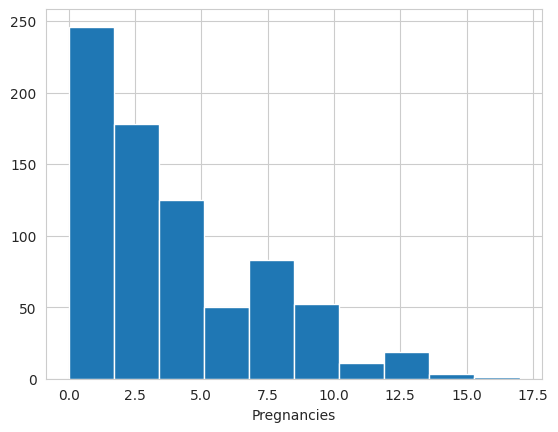

In [9]:
sns.set_style('whitegrid')
dia_df['Pregnancies'].hist(bins=10)
plt.xlabel("Pregnancies")

Text(0.5, 0, 'BloodPressure')

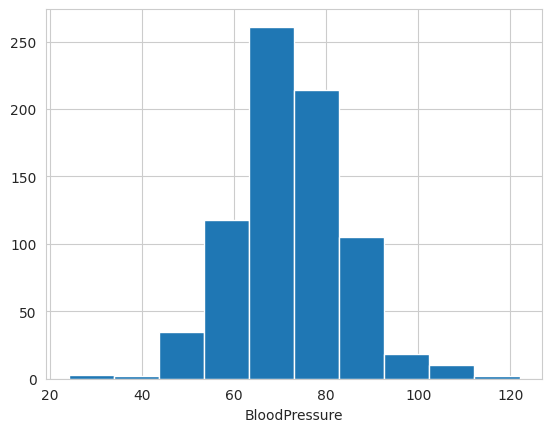

In [10]:
sns.set_style('whitegrid')
dia_df['BloodPressure'].hist(bins=10)
plt.xlabel("BloodPressure")

Text(0.5, 0, 'Glucose')

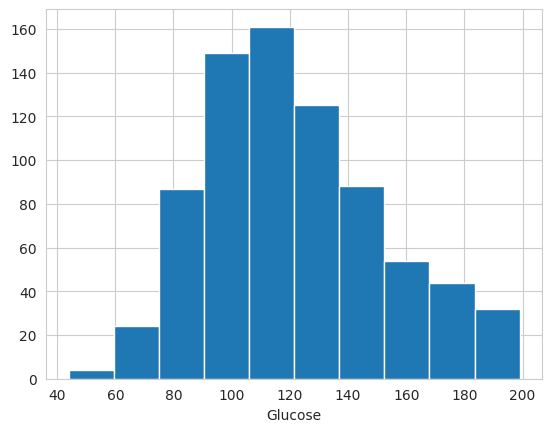

In [11]:
sns.set_style('whitegrid')
dia_df['Glucose'].hist(bins=10)
plt.xlabel("Glucose")

Text(0.5, 0, 'SkinThickness')

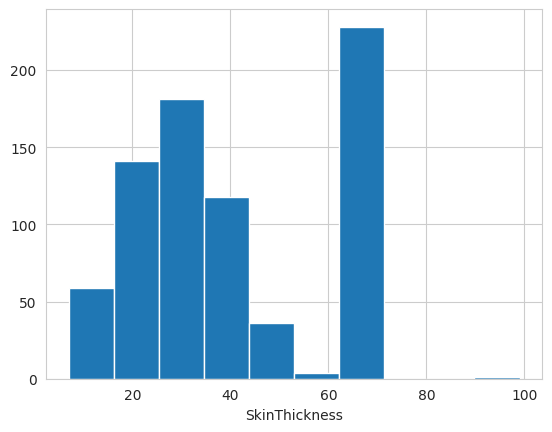

In [12]:
sns.set_style('whitegrid')
dia_df['SkinThickness'].hist(bins=10)
plt.xlabel("SkinThickness")

Text(0.5, 0, 'Insulin')

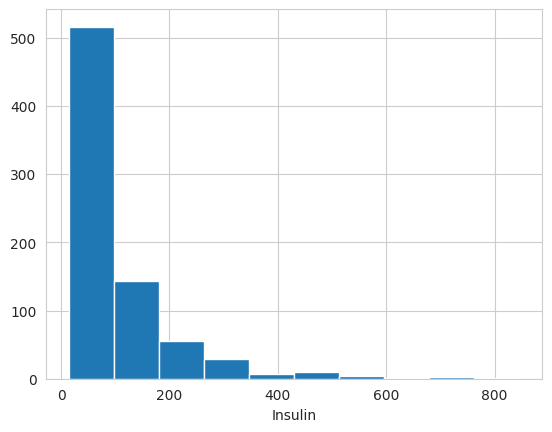

In [13]:
sns.set_style('whitegrid')
dia_df['Insulin'].hist(bins=10)
plt.xlabel("Insulin")

Text(0.5, 0, 'BMI')

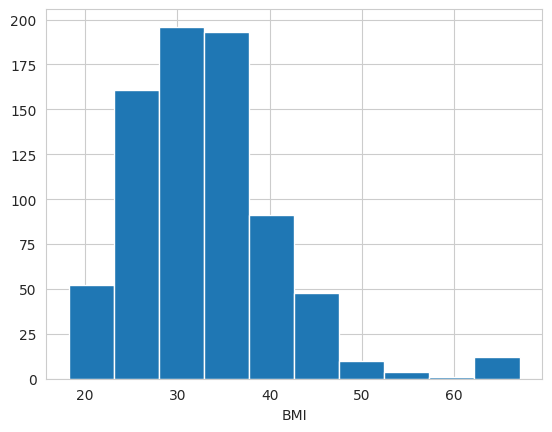

In [14]:
sns.set_style('whitegrid')
dia_df['BMI'].hist(bins=10)
plt.xlabel("BMI")

Text(0.5, 0, 'DiabetesPedigreeFunction')

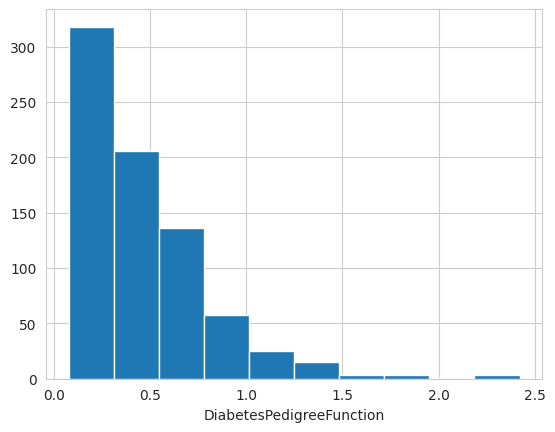

In [15]:
sns.set_style('whitegrid')
dia_df['DiabetesPedigreeFunction'].hist(bins=10)
plt.xlabel("DiabetesPedigreeFunction")

Text(0.5, 0, 'Age')

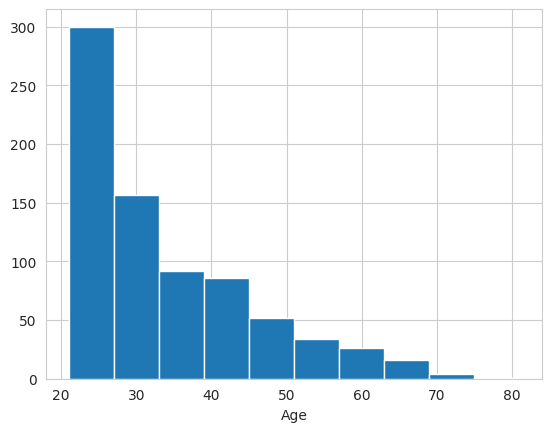

In [16]:
sns.set_style('whitegrid')
dia_df['Age'].hist(bins=10)
plt.xlabel("Age")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


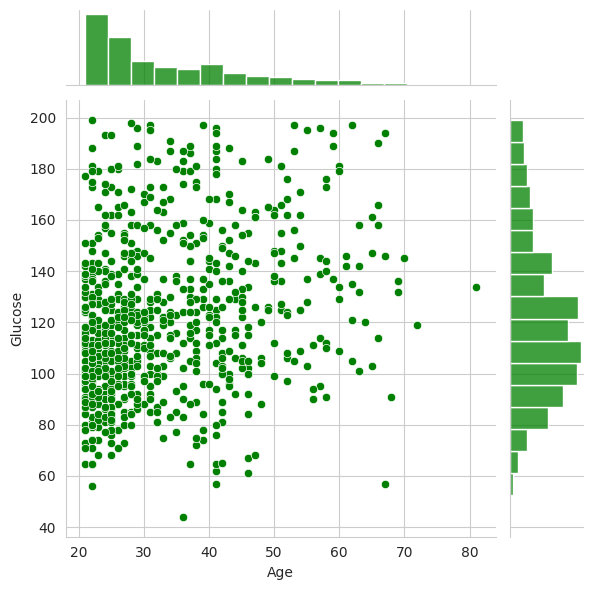

In [17]:
sns.jointplot(x='Age',y='Glucose',data=dia_df,color='green')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


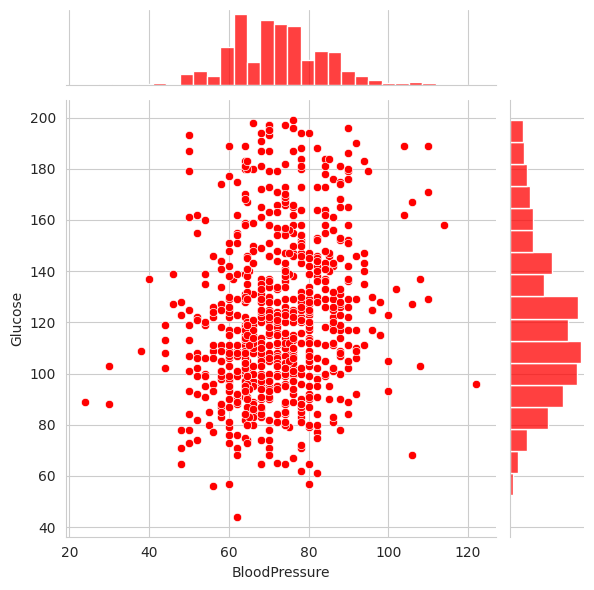

In [18]:
sns.jointplot(x='BloodPressure',y='Glucose',data=dia_df,color='red')

In [19]:
dia_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = dia_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = dia_df['Outcome']

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Predictions and Evaluation**

In [25]:
predictions = logmodel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       150
           1       0.72      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



**KNN Method**

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(dia_df.drop('Outcome',axis=1))

StandardScaler()

In [31]:
scaled_features = scaler.transform(dia_df.drop('Outcome',axis=1))

In [32]:
dia_df = pd.DataFrame(scaled_features,columns=dia_df.columns[:-1])
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.867483,-0.003554,-0.250146,-0.484753,0.087111,0.468492,1.425995
1,-0.844885,-1.180479,-0.495303,-0.577080,-0.484753,-0.804264,-0.365061,-0.190672
2,1.233880,2.005240,-0.659219,1.355409,-0.484753,-1.224483,0.604397,-0.105584
3,-0.844885,-1.050449,-0.495303,-0.904014,-0.178361,-0.613255,-0.920763,-1.041549
4,-1.141852,0.509902,-2.626215,-0.250146,0.589322,1.296834,5.484909,-0.020496


**Train and Test Split**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Using KNN**

In [34]:
from sklearn.neighbors import KNeighborsClassifier


In [35]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

finding k using the elbow method

Text(0, 0.5, 'Error Rate')

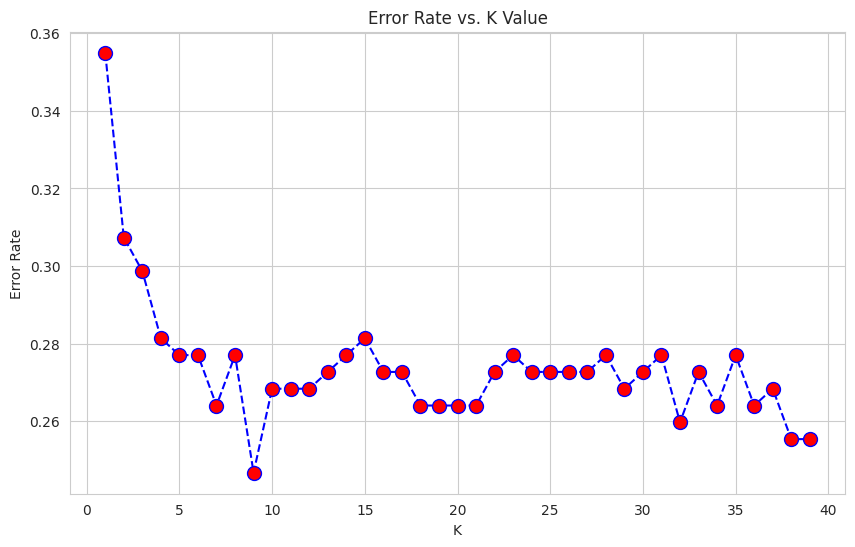

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[131  19]
 [ 42  39]]


              precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.48      0.56        81

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231

